In [1]:
import struct
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound

In [2]:
def open_ogi_binary(filename):
    with open(filename,'rb') as f:
        n_iter = struct.unpack('>I', f.read(4))[0]

        times = np.zeros(n_iter)
        a = np.zeros(n_iter)
        e = np.zeros(n_iter)
        for i in range(n_iter):
            times[i] = (struct.unpack('>d', f.read(8))[0])
            a[i] = (struct.unpack('>d', f.read(8))[0])
            e[i] = (struct.unpack('>d', f.read(8))[0])
    return times,a,e

Initial conditions, before perturbation, we have a semi major axis of 1AU, and eccentricity of exactly 0.

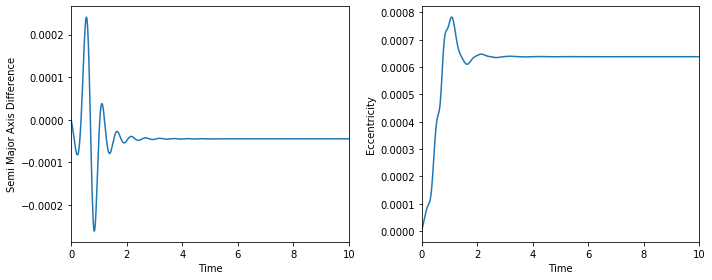

In [6]:
times,a,e = open_ogi_binary('data/ogi_1.bin')

fig = plt.figure(figsize=(10,4))
axs = fig.subplots(1,2)
axs[0].plot(times,1-a)
axs[1].plot(times,e)

axs[0].set_ylabel('Semi Major Axis Difference')
axs[1].set_ylabel('Eccentricity')

axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')

for ax in axs:
    ax.set_xlim(0,10)
    
plt.savefig('sim_example.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

Post-perturbation the planet has clearly changed. Interesting ring down effect though.

Now what if we run the simulation 1000 times? What is the distribution of final semi major axes, and final eccentricities?

In [3]:
times=[]
semi_major_axis_diffs=[]
eccentricities=[]
for filename in glob.glob('data/ogi_*.bin'):
    t,a,e = open_ogi_binary(filename)
    times.append(t)
    semi_major_axis_diffs.append(1-a)
    eccentricities.append(e)

In [8]:
final_as = []
final_es = []
for el in semi_major_axis_diffs:
    final_as.append(el[-1])
    
for el in eccentricities:
    final_es.append(el[-1])

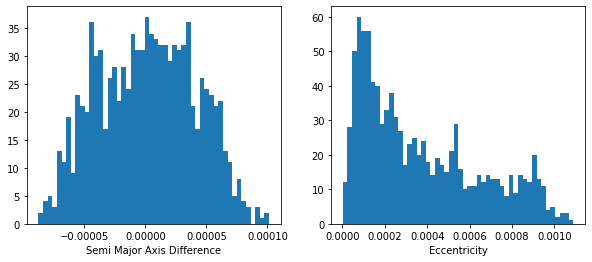

In [9]:
fig = plt.figure(figsize=(10,4))
axs = fig.subplots(1,2)
axs[0].hist(final_as, bins=50)
axs[1].hist(final_es, bins=50)
axs[0].set_xlabel('Semi Major Axis Difference')
axs[1].set_xlabel('Eccentricity')

plt.savefig('sim_hist.png', bbox_inches='tight')
plt.show()

Very interesting! Semi major axis could maybe be gaussian? Albeit a really wide one. The eccentricity on the other hand (cant be negative) looks Maxwell-Boltzmann like...

In [10]:
np.mean(final_as)

1.7117634061589725e-06

In [11]:
np.mean(final_es)

0.00036955056282435424